In [1]:
pip install alphashape


     -------------------------------------- 642.1/642.1 KB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import sys
import pandas as pd
import numpy as np
from descartes import PolygonPatch
import matplotlib.pyplot as plt
sys.path.insert(0, os.path.dirname(os.getcwd()))
import alphashape

In [5]:
points_2d = [(0., 0.), (0., 1.), (1., 1.), (1., 0.),
          (0.5, 0.25), (0.5, 0.75), (0.25, 0.5), (0.75, 0.5)]

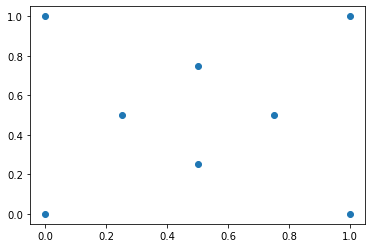

In [6]:
fig, ax = plt.subplots()
ax.scatter(*zip(*points_2d))
plt.show()

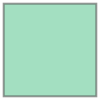

In [7]:
alpha_shape = alphashape.alphashape(points_2d, 0.)
alpha_shape

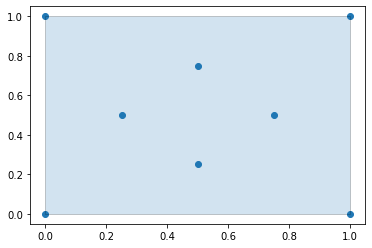

In [8]:
fig, ax = plt.subplots()
ax.scatter(*zip(*points_2d))
ax.add_patch(PolygonPatch(alpha_shape, alpha=0.2))
plt.show()

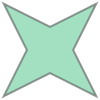

In [9]:
alpha_shape = alphashape.alphashape(points_2d, 2.0)
alpha_shape

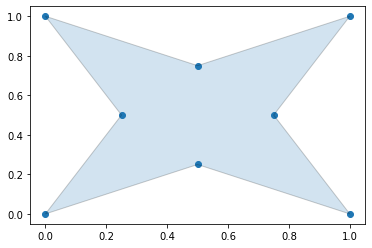

In [10]:
fig, ax = plt.subplots()
ax.scatter(*zip(*points_2d))
ax.add_patch(PolygonPatch(alpha_shape, alpha=0.2))
plt.show()

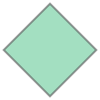

In [11]:
alpha_shape = alphashape.alphashape(points_2d, 3.5)
alpha_shape

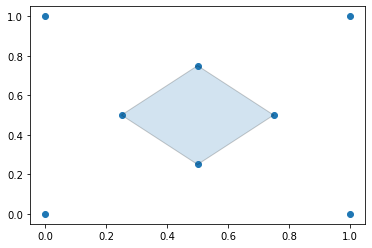

In [12]:
fig, ax = plt.subplots()
ax.scatter(*zip(*points_2d))
ax.add_patch(PolygonPatch(alpha_shape, alpha=0.2))
plt.show()

In [13]:
alpha_shape = alphashape.alphashape(points_2d, 5.0)
print(alpha_shape)

GEOMETRYCOLLECTION EMPTY


In [ ]:
import os
import geopandas
data = os.path.join(os.getcwd(), 'data', 'Public_Airports_March2018.shp')
gdf = geopandas.read_file(data)

In [14]:
import geopandas

path_to_data = geopandas.datasets.get_path("nybb")
gdf = geopandas.read_file(path_to_data)

gdf

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...  
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...

In [16]:
gdf.to_file("my_file.geojson", driver="GeoJSON")

In [17]:
gdf = gdf.set_index("BoroName")

In [18]:
gdf["area"] = gdf.area
gdf["area"]

BoroName
Staten Island    1.623822e+09
Queens           3.045214e+09
Brooklyn         1.937478e+09
Manhattan        6.364712e+08
Bronx            1.186926e+09
Name: area, dtype: float64

In [19]:
gdf['boundary'] = gdf.boundary
gdf['boundary']

BoroName
Staten Island    MULTILINESTRING ((970217.022 145643.332, 97022...
Queens           MULTILINESTRING ((1029606.077 156073.814, 1029...
Brooklyn         MULTILINESTRING ((1021176.479 151374.797, 1021...
Manhattan        MULTILINESTRING ((981219.056 188655.316, 98094...
Bronx            MULTILINESTRING ((1012821.806 229228.265, 1012...
Name: boundary, dtype: geometry

In [20]:
gdf['centroid'] = gdf.centroid
gdf['centroid']

BoroName
Staten Island     POINT (941639.450 150931.991)
Queens           POINT (1034578.078 197116.604)
Brooklyn          POINT (998769.115 174169.761)
Manhattan         POINT (993336.965 222451.437)
Bronx            POINT (1021174.790 249937.980)
Name: centroid, dtype: geometry

In [21]:
first_point = gdf['centroid'].iloc[0]
gdf['distance'] = gdf['centroid'].distance(first_point)
gdf['distance']

BoroName
Staten Island         0.000000
Queens           103781.535276
Brooklyn          61674.893421
Manhattan         88247.742789
Bronx            126996.283623
Name: distance, dtype: float64

In [22]:
gdf['distance'].mean()

76140.09102166798

<AxesSubplot:>

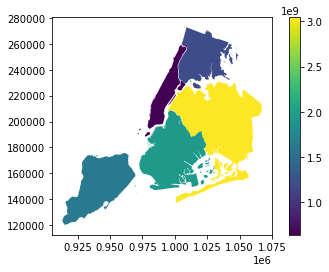

In [23]:
gdf.plot("area", legend=True)

In [24]:
gdf.explore("area", legend=False)

<AxesSubplot:>

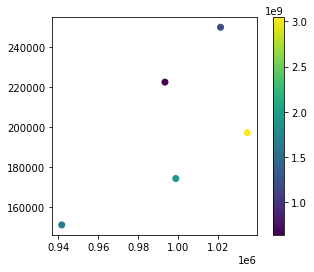

In [25]:
gdf = gdf.set_geometry("centroid")
gdf.plot("area", legend=True)

<AxesSubplot:>

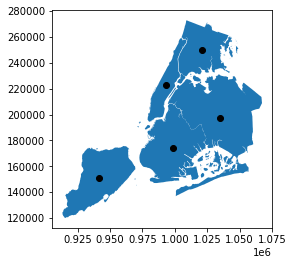

In [26]:
ax = gdf["geometry"].plot()
gdf["centroid"].plot(ax=ax, color="black")

In [27]:
gdf = gdf.set_geometry("geometry")

In [28]:
gdf["convex_hull"] = gdf.convex_hull

<AxesSubplot:>

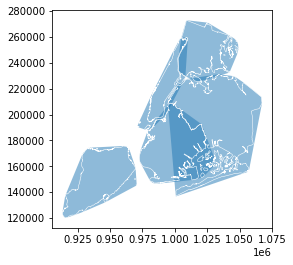

In [31]:
ax = gdf["convex_hull"].plot(alpha=.5)  # saving the first plot as an axis and setting alpha (transparency) to 0.5
gdf["boundary"].plot(ax=ax, color="white", linewidth=.5)  # passing the first plot and setting linewitdth to 0.5

In [32]:
# buffering the active geometry by 10 000 feet (geometry is already in feet)
gdf["buffered"] = gdf.buffer(10000)

# buffering the centroid geometry by 10 000 feet (geometry is already in feet)
gdf["buffered_centroid"] = gdf["centroid"].buffer(10000)

<AxesSubplot:>

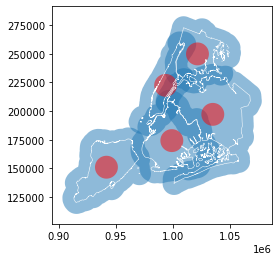

In [33]:
ax = gdf["buffered"].plot(alpha=.5)  # saving the first plot as an axis and setting alpha (transparency) to 0.5
gdf["buffered_centroid"].plot(ax=ax, color="red", alpha=.5)  # passing the first plot as an axis to the second
gdf["boundary"].plot(ax=ax, color="white", linewidth=.5)  # passing the first plot and setting linewitdth to 0.5

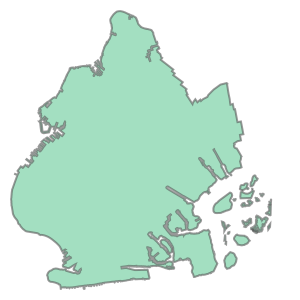

In [34]:
brooklyn = gdf.loc["Brooklyn", "geometry"]
brooklyn

In [35]:
type(brooklyn)

shapely.geometry.multipolygon.MultiPolygon

In [36]:
gdf["buffered"].intersects(brooklyn)

BoroName
Staten Island     True
Queens            True
Brooklyn          True
Manhattan         True
Bronx            False
dtype: bool

In [37]:
gdf["within"] = gdf["buffered_centroid"].within(gdf)
gdf["within"]

BoroName
Staten Island     True
Queens            True
Brooklyn         False
Manhattan        False
Bronx            False
Name: within, dtype: bool

<AxesSubplot:>

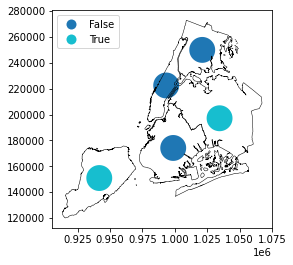

In [38]:
gdf = gdf.set_geometry("buffered_centroid")
ax = gdf.plot("within", legend=True, categorical=True, legend_kwds={'loc': "upper left"})  # using categorical plot and setting the position of the legend
gdf["boundary"].plot(ax=ax, color="black", linewidth=.5)  # passing the first plot and setting linewitdth to 0.5

In [39]:
gdf.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

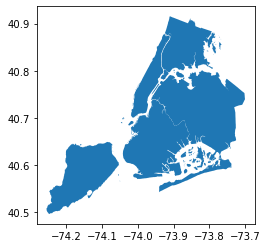

In [40]:
gdf = gdf.set_geometry("geometry")
boroughs_4326 = gdf.to_crs("EPSG:4326")
boroughs_4326.plot()